In [1]:
import nltk
print(nltk.pos_tag(['a','moving','channel']))
print(nltk.pos_tag(['moving']))

[('a', 'DT'), ('moving', 'NN'), ('channel', 'NN')]
[('moving', 'VBG')]


In [172]:
import emoji
emoji.is_emoji('😂')

True

In [2]:
train = open(r'D:\Leiden\TextMining\W-NUT_data\wnut17train.conll','r',encoding='utf-8')
test = open(r'D:\Leiden\TextMining\W-NUT_data\emerging.test.annotated','r',encoding='utf-8')
dev = open(r'D:\Leiden\TextMining\W-NUT_data\emerging.dev.conll','r',encoding='utf-8')

train_list = []
sentence_list = []
label_list = []
temp_list = []
for line in train:
    if line.strip() != "":
        s = line.strip().split('\t')
        sentence_list.append(s[0])
        label_list.append(s[1])
    else:
        pos = nltk.pos_tag(sentence_list)
        for word_pos, label in zip(pos, label_list):
            temp_list.append(word_pos + (label,))
        train_list.append(temp_list)
        sentence_list = []
        label_list = []
        temp_list = []
        
test_list = []
sentence_list = []
label_list = []
temp_list = []
for line in test:
    if line.strip() != "":
        s = line.strip().split('\t')
        sentence_list.append(s[0])
        label_list.append(s[1])
    else:
        pos = nltk.pos_tag(sentence_list)
        for word_pos, label in zip(pos, label_list):
            temp_list.append(word_pos + (label,))
        test_list.append(temp_list)
        sentence_list = []
        label_list = []
        temp_list = []
        
dev_list = []
sentence_list = []
label_list = []
temp_list = []
for line in dev:
    if line.strip() != "":
        s = line.strip().split('\t')
        # in the last lines of dev file, 
        # there is an invisible space can't be tackled by strip() or other conditions
        # so, use the length of s
        if len(s) > 1:
            sentence_list.append(s[0])
            label_list.append(s[1])
        else:
            pos = nltk.pos_tag(sentence_list)
            for word_pos, label in zip(pos, label_list):
                temp_list.append(word_pos + (label,))
            dev_list.append(temp_list)
            sentence_list = []
            label_list = []
            temp_list = []
    else:
        pos = nltk.pos_tag(sentence_list)
        for word_pos, label in zip(pos, label_list):
            temp_list.append(word_pos + (label,))
        dev_list.append(temp_list)
        sentence_list = []
        label_list = []
        temp_list = []

In [2]:
# give pos word by word, (worse result)
# train = open(r'D:\Leiden\TextMining\W-NUT_data\wnut17train.conll','r',encoding='utf-8')
# test = open(r'D:\Leiden\TextMining\W-NUT_data\emerging.test.annotated','r',encoding='utf-8')
# dev = open(r'D:\Leiden\TextMining\W-NUT_data\emerging.dev.conll','r',encoding='utf-8')

# train_list = []
# temp_list = []
# for line in train:
#     if line.strip() != "":
#         s = line.strip().split('\t')
#         pos = nltk.pos_tag([s[0]])
#         temp_list.append((s[0], pos[0][1], s[1]))
#     else:
#         train_list.append(temp_list)
#         temp_list = []

# test_list = []
# temp_list = []
# for line in test:
#     if line.strip() != "":
#         s = line.strip().split('\t')
#         pos = nltk.pos_tag([s[0]])
#         temp_list.append((s[0], pos[0][1], s[1]))
#     else:
#         test_list.append(temp_list)
#         temp_list = []
        
# dev_list = []
# temp_list = []
# for line in dev:
#     if line.strip() != "":
#         s = line.strip().split('\t')
#         # in the last lines of dev file, 
#         # there is an invisible space can't be tackled by strip() or other conditions
#         # so, use the length of s
#         if len(s) > 1:
#             pos = nltk.pos_tag([s[0]])
#             temp_list.append((s[0], pos[0][1], s[1]))
#         else:
#             dev_list.append(temp_list)
#             temp_list = []
#     else:
#         dev_list.append(temp_list)
#         temp_list = []

In [3]:
train_list[-4]

[('On', 'IN', 'O'),
 ('January', 'NNP', 'O'),
 ('22nd', 'CD', 'O'),
 (',', ',', 'O'),
 ('from', 'IN', 'O'),
 ('11-', 'JJ', 'O'),
 ('1.30', 'CD', 'O'),
 (',', ',', 'O'),
 ('TVPS', 'NNP', 'B-location'),
 ('will', 'MD', 'O'),
 ('be', 'VB', 'O'),
 ('offering', 'VBG', 'O'),
 ('free', 'JJ', 'O'),
 ('60', 'CD', 'O'),
 ('second', 'JJ', 'O'),
 ('HIV', 'NNP', 'O'),
 ('Testing', 'NNP', 'O'),
 ('.', '.', 'O'),
 ('This', 'DT', 'O'),
 ('is', 'VBZ', 'O'),
 ('a', 'DT', 'O'),
 ('really', 'RB', 'O'),
 ('important', 'JJ', 'O'),
 ('habit', 'NN', 'O'),
 ('...', ':', 'O'),
 ('http://t.co/GXg82y7Hw4', 'NN', 'O')]

In [4]:
test_list[-1]

[('@', 'NN', 'B-person'),
 ('KenyeahMonae', 'NNP', 'I-person'),
 ('It', 'PRP', 'O'),
 ("'", "''", 'O'),
 ('s', 'JJ', 'O'),
 ('my', 'PRP$', 'O'),
 ('school', 'NN', 'O'),
 ('fault', 'NN', 'O'),
 (',', ',', 'O'),
 ('girl', 'NN', 'O'),
 ('they', 'PRP', 'O'),
 ('cutting', 'VBG', 'O'),
 ('up', 'RP', 'O'),
 ('with', 'IN', 'O'),
 ('this', 'DT', 'O'),
 ('dress', 'NN', 'O'),
 ('code', 'NN', 'O'),
 ('😂', 'NN', 'O')]

In [5]:
dev_list[-1]

[('This', 'DT', 'O'),
 ('guy', 'NN', 'O'),
 ('needs', 'VBZ', 'O'),
 ('his', 'PRP$', 'O'),
 ('own', 'JJ', 'O'),
 ('show', 'NN', 'O'),
 ('on', 'IN', 'O'),
 ('Discivery', 'NNP', 'B-corporation'),
 ('Channel', 'NNP', 'I-corporation'),
 ('!', '.', 'O')]

## statistics of the data

In [178]:
print('The number of sentences in train is: ' + str(len(train_list)))
print('The number of sentences in dev is: ' + str(len(dev_list)))
print('The number of sentences in test is: ' + str(len(test_list)))

The number of sentences in train is: 3394
The number of sentences in dev is: 1009
The number of sentences in test is: 1287


In [179]:
def word_count(sentencelist):
    wordcount = 0
    for sentence in sentencelist:
        for word in sentence:
            wordcount += 1
            
    return wordcount

In [180]:
print('The number of words in train is: ' + str(word_count(train_list)))
print('The number of words in dev is: ' + str(word_count(dev_list)))
print('The number of words in test is: ' + str(word_count(test_list)))

The number of words in train is: 62730
The number of words in dev is: 15733
The number of words in test is: 23394


In [237]:
def sentencelengths(sentencelist):
    length_list = []
    for sentence in sentencelist:
        length_list.append(len(sentence))
            
    return length_list

In [238]:
trainsentlengths = sentencelengths(train_list)
devsentlengths = sentencelengths(dev_list)
testsentlengths = sentencelengths(test_list)

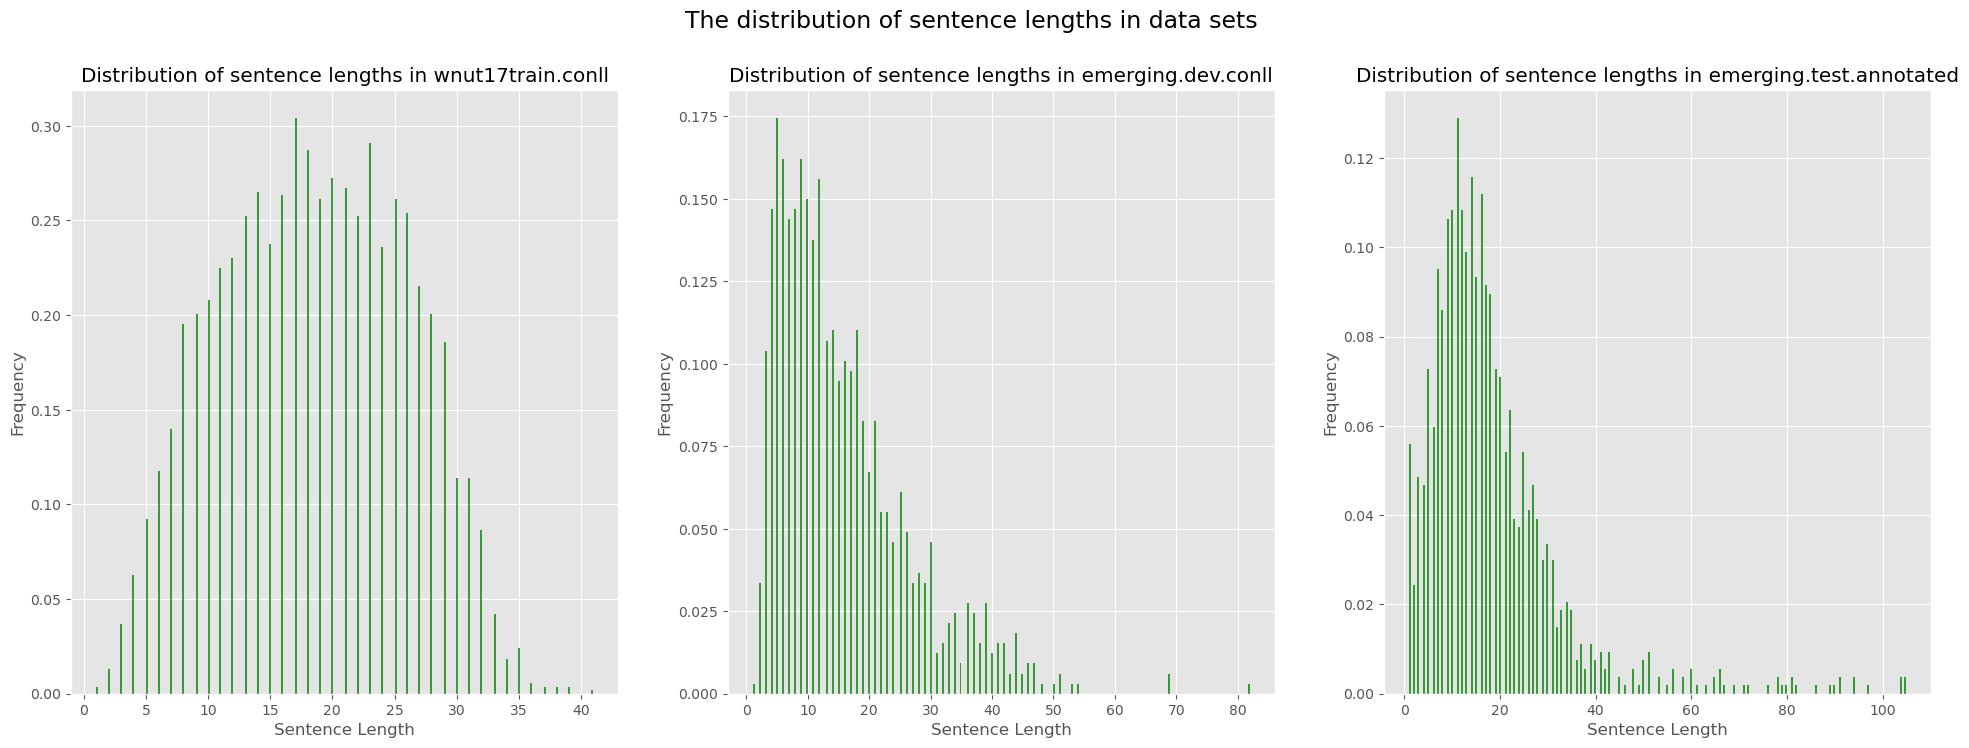

In [243]:
plt.subplots(1, 3, figsize=(24,8), dpi=100)
plt.suptitle("The distribution of sentence lengths in data sets", fontsize=17)
plt.subplot(1, 3, 1)
n, bins, patches = plt.hist(trainsentlengths, 250, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths in wnut17train.conll')

plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(devsentlengths, 250, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths in emerging.dev.conll')

plt.subplot(1, 3, 3)
n, bins, patches = plt.hist(testsentlengths, 250, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of sentence lengths in emerging.test.annotated')
plt.show()

In [182]:
def label_count(sentencelist):
    labelcountdic = {'B-location':0,
                     'I-location':0,
                     'B-group':0,
                     'B-corporation':0,
                     'B-person':0,
                     'B-creative-work':0,
                     'B-product':0,
                     'I-person':0,
                     'I-creative-work':0,
                     'I-corporation':0,
                     'I-group':0,
                     'I-product':0,
                     'O':0}
    for sentence in sentencelist:
        for word in sentence:
            label = word[2]
            labelcountdic[label] += 1
    return labelcountdic

In [184]:
trainlabelDic = label_count(train_list)
devlabelDic = label_count(dev_list)
testlabelDic = label_count(test_list)

In [185]:
trainlabelDic

{'B-location': 548,
 'I-location': 245,
 'B-group': 264,
 'B-corporation': 221,
 'B-person': 660,
 'B-creative-work': 140,
 'B-product': 142,
 'I-person': 335,
 'I-creative-work': 206,
 'I-corporation': 46,
 'I-group': 150,
 'I-product': 203,
 'O': 59570}

In [186]:
devlabelDic

{'B-location': 74,
 'I-location': 33,
 'B-group': 39,
 'B-corporation': 34,
 'B-person': 470,
 'B-creative-work': 105,
 'B-product': 114,
 'I-person': 117,
 'I-creative-work': 133,
 'I-corporation': 12,
 'I-group': 25,
 'I-product': 94,
 'O': 14483}

In [187]:
testlabelDic

{'B-location': 150,
 'I-location': 94,
 'B-group': 165,
 'B-corporation': 66,
 'B-person': 429,
 'B-creative-work': 142,
 'B-product': 127,
 'I-person': 131,
 'I-creative-work': 218,
 'I-corporation': 22,
 'I-group': 70,
 'I-product': 126,
 'O': 21654}

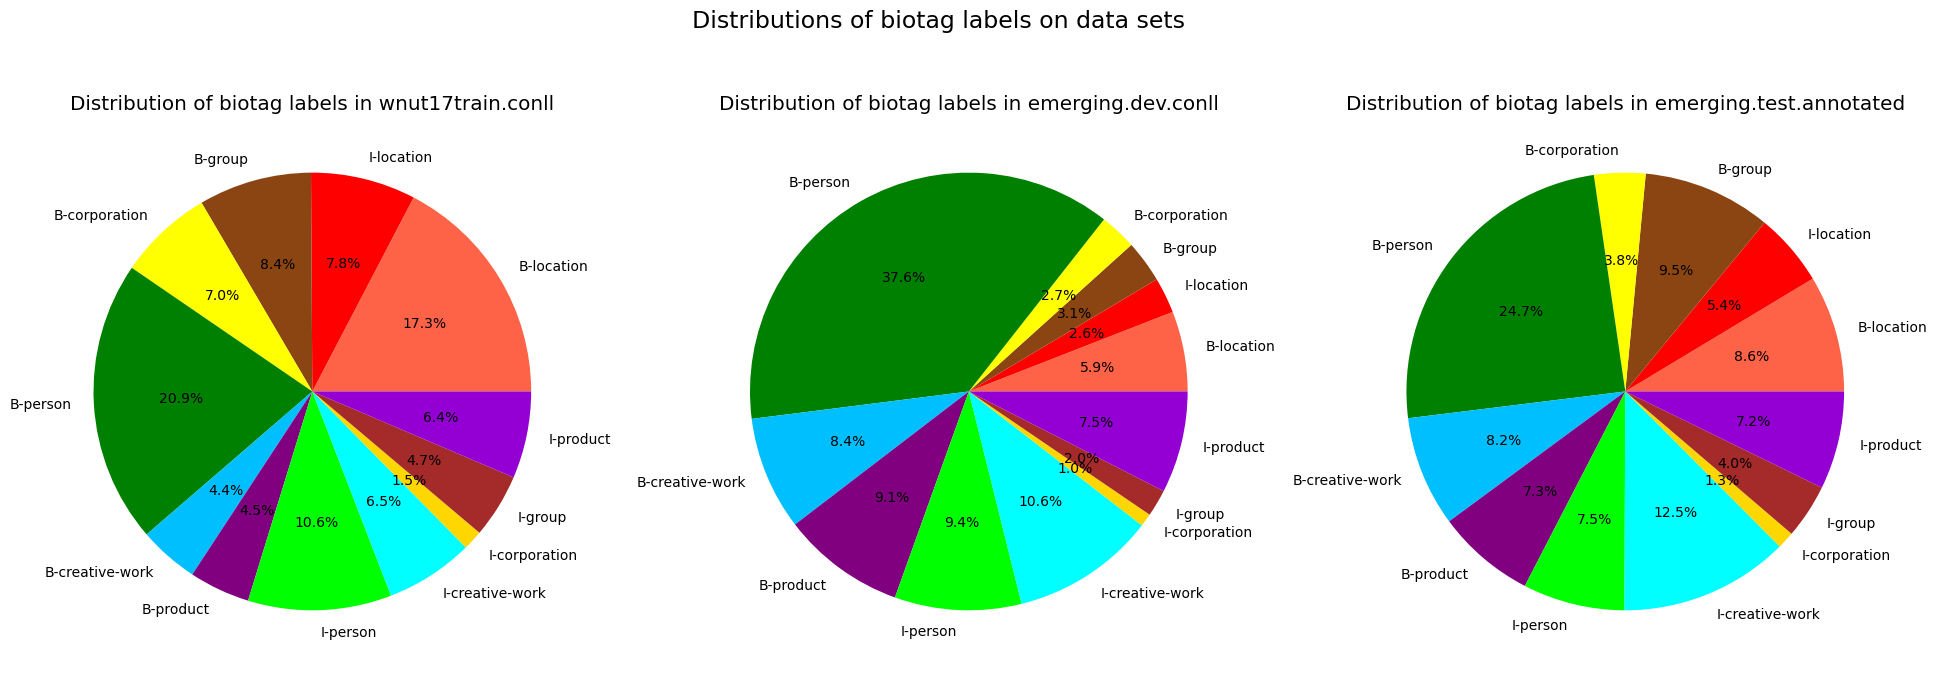

In [235]:
import matplotlib.pyplot as plt
colors = ['tomato', 'red', 'saddlebrown', 'yellow', 'green', 'deepskyblue', 'purple', 'lime', 'cyan', 'gold', 'brown', 'darkviolet']
plt.subplots(1, 3, figsize=(24,8), dpi=100)
plt.suptitle("Distributions of biotag labels in data sets", fontsize=17)
plt.subplot(1, 3, 1)
plt.pie(list(trainlabelDic.values())[:-1], labels=list(trainlabelDic.keys())[:-1], colors=colors, autopct='%1.1f%%')
plt.title('Distribution of biotag labels in wnut17train.conll')

plt.subplot(1, 3, 2)
plt.pie(list(devlabelDic.values())[:-1], labels=list(devlabelDic.keys())[:-1], colors=colors, autopct='%1.1f%%')
plt.title('Distribution of biotag labels in emerging.dev.conll')

plt.subplot(1, 3, 3)
plt.pie(list(testlabelDic.values())[:-1], labels=list(testlabelDic.keys())[:-1], colors=colors, autopct='%1.1f%%')
plt.title('Distribution of biotag labels in emerging.test.annotated')
plt.show()

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
from itertools import chain

import nltk
import sklearn
import scipy.stats
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

## Tutorial features (baseline)

In [8]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],        
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True
                
    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [9]:
%%time
X_train = [sent2features(s) for s in train_list]
y_train = [sent2labels(s) for s in train_list]

X_dev = [sent2features(s) for s in dev_list]
y_dev = [sent2labels(s) for s in dev_list]

X_test = [sent2features(s) for s in test_list]
y_test = [sent2labels(s) for s in test_list]

Wall time: 251 ms


In [10]:
%%time
baseline = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
baseline.fit(X_train, y_train)

Wall time: 8.73 s


C:\Users\15852\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.1, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

In [11]:
labels = list(baseline.classes_)
labels.remove('O')
labels

['B-location',
 'I-location',
 'B-group',
 'B-corporation',
 'B-person',
 'B-creative-work',
 'B-product',
 'I-person',
 'I-creative-work',
 'I-corporation',
 'I-group',
 'I-product']

In [12]:
y_pred = baseline.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.14220916330790342

In [13]:
# group B and I results
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

                 precision    recall  f1-score   support

  B-corporation      0.000     0.000     0.000        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.333     0.035     0.064       142
I-creative-work      0.296     0.037     0.065       218
        B-group      0.300     0.036     0.065       165
        I-group      0.357     0.071     0.119        70
     B-location      0.385     0.233     0.290       150
     I-location      0.231     0.064     0.100        94
       B-person      0.551     0.138     0.220       429
       I-person      0.547     0.221     0.315       131
      B-product      0.600     0.024     0.045       127
      I-product      0.375     0.048     0.085       126

      micro avg      0.430     0.093     0.153      1740
      macro avg      0.331     0.076     0.114      1740
   weighted avg      0.401     0.093     0.142      1740



##  hyperparameter optimization

In [14]:
%%time
# define fixed parameters and parameters to search
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    max_iterations=100, 
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score, 
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space, 
                        cv=3, 
                        verbose=1, 
                        n_jobs=-1, 
                        n_iter=50, 
                        scoring=f1_scorer)
rs.fit(X_dev, y_dev)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   40.3s finished


Wall time: 42.4 s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=CRF(algorithm='lbfgs', all_possible_states=None,
                                 all_possible_transitions=True, averaging=None,
                                 c=None, c1=None, c2=None,
                                 calibration_candidates=None,
                                 calibration_eta=None,
                                 calibration_max_trials=None,
                                 calibration_rate=None,
                                 calibration_samples=None, delta=None,
                                 epsilon=None, error_sensitive=None, gamma=None,
                                 keep_...
                                        'c2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C2690E0D0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(flat_f1_score, average=weighte

In [15]:
# crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

best params: {'c1': 0.01619477211079689, 'c2': 0.01130243756345373}
best CV score: 0.3593448155443235
model size: 0.46M


Dark blue => 0.3013, bright yellow => 0.3593


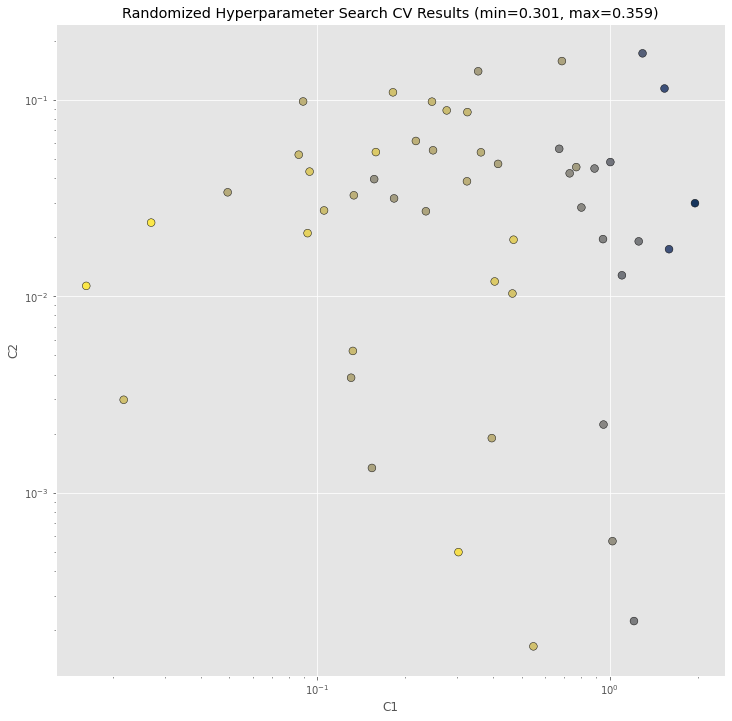

In [16]:
_x = [s['c1'] for s in rs.cv_results_['params']]
_y = [s['c2'] for s in rs.cv_results_['params']]
_c = [s for s in rs.cv_results_['mean_test_score']]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

ax.scatter(_x, _y, c=_c, s=60, cmap='cividis', alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, bright yellow => {:0.4}".format(min(_c), max(_c)))

In [17]:
crf = rs.best_estimator_
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))
print(metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels))

                 precision    recall  f1-score   support

  B-corporation      1.000     0.015     0.030        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.163     0.092     0.117       142
I-creative-work      0.154     0.197     0.173       218
        B-group      0.250     0.006     0.012       165
        I-group      0.375     0.043     0.077        70
     B-location      0.356     0.173     0.233       150
     I-location      0.179     0.053     0.082        94
       B-person      0.473     0.371     0.416       429
       I-person      0.459     0.382     0.417       131
      B-product      0.101     0.071     0.083       127
      I-product      0.056     0.040     0.047       126

      micro avg      0.287     0.181     0.222      1740
      macro avg      0.297     0.120     0.141      1740
   weighted avg      0.312     0.181     0.204      1740

0.20442496094866078


## Extend the features

### larger context  (-2, 2)

In [110]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],        
    }
    if i > 1:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        word2 = sent[i-2][0]
        postag2 = sent[i-2][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
            '-2:word.lower()': word2.lower(),
            '-2:word.istitle()': word2.istitle(),
            '-2:word.isupper()': word2.isupper(),
            '-2:postag': postag2,
            '-2:postag[:2]': postag2[:2],
        })
#     the result of considering specific BOS or EOS word is worse
#     elif i==1:
#         word1 = sent[i-1][0]
#         postag1 = sent[i-1][1]
#         features.update({
#             '-1:word.lower()': word1.lower(),
#             '-1:word.istitle()': word1.istitle(),
#             '-1:word.isupper()': word1.isupper(),
#             '-1:postag': postag1,
#             '-1:postag[:2]': postag1[:2],
#         })
    else:
        features['BOS'] = True
           
    if i < len(sent)-2:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        word2 = sent[i+2][0]
        postag2 = sent[i+2][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
            '+2:word.lower()': word2.lower(),
            '+2:word.istitle()': word2.istitle(),
            '+2:word.isupper()': word2.isupper(),
            '+2:postag': postag2,
            '+2:postag[:2]': postag2[:2],
        })
#     the result of considering specific BOS or EOS word is worse
#     elif i==len(sent)-2:
#         word1 = sent[i+1][0]
#         postag1 = sent[i+1][1]
#         features.update({
#             '+1:word.lower()': word1.lower(),
#             '+1:word.istitle()': word1.istitle(),
#             '+1:word.isupper()': word1.isupper(),
#             '+1:postag': postag1,
#             '+1:postag[:2]': postag1[:2],
#         })
    else:
        features['EOS'] = True
                
    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

### larger context (-3, 3)

In [113]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],        
    }
    if i > 2:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        word2 = sent[i-2][0]
        postag2 = sent[i-2][1]
        word3 = sent[i-3][0]
        postag3 = sent[i-3][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
            '-2:word.lower()': word2.lower(),
            '-2:word.istitle()': word2.istitle(),
            '-2:word.isupper()': word2.isupper(),
            '-2:postag': postag2,
            '-2:postag[:2]': postag2[:2],
            '-3:word.lower()': word3.lower(),
            '-3:word.istitle()': word3.istitle(),
            '-3:word.isupper()': word3.isupper(),
            '-3:postag': postag3,
            '-3:postag[:2]': postag3[:2],
        })
#     the result of considering specific BOS or EOS word is worse
#     elif i==2:
#         word1 = sent[i-1][0]
#         postag1 = sent[i-1][1]
#         word2 = sent[i-2][0]
#         postag2 = sent[i-2][1]
#         features.update({
#             '-1:word.lower()': word1.lower(),
#             '-1:word.istitle()': word1.istitle(),
#             '-1:word.isupper()': word1.isupper(),
#             '-1:postag': postag1,
#             '-1:postag[:2]': postag1[:2],
#             '-2:word.lower()': word2.lower(),
#             '-2:word.istitle()': word2.istitle(),
#             '-2:word.isupper()': word2.isupper(),
#             '-2:postag': postag2,
#             '-2:postag[:2]': postag2[:2],
#         })
    else:
        features['BOS'] = True
           
    if i < len(sent)-3:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        word2 = sent[i+2][0]
        postag2 = sent[i+2][1]
        word3 = sent[i+3][0]
        postag3 = sent[i+3][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
            '+2:word.lower()': word2.lower(),
            '+2:word.istitle()': word2.istitle(),
            '+2:word.isupper()': word2.isupper(),
            '+2:postag': postag2,
            '+2:postag[:2]': postag2[:2],
            '+3:word.lower()': word3.lower(),
            '+3:word.istitle()': word3.istitle(),
            '+3:word.isupper()': word3.isupper(),
            '+3:postag': postag3,
            '+3:postag[:2]': postag3[:2],
        })
#     the result of considering specific BOS or EOS word is worse
#     elif i==len(sent)-3:
#         word1 = sent[i+1][0]
#         postag1 = sent[i+1][1]
#         word2 = sent[i+2][0]
#         postag2 = sent[i+2][1]
#         features.update({
#             '+1:word.lower()': word1.lower(),
#             '+1:word.istitle()': word1.istitle(),
#             '+1:word.isupper()': word1.isupper(),
#             '+1:postag': postag1,
#             '+1:postag[:2]': postag1[:2],
#             '+2:word.lower()': word2.lower(),
#             '+2:word.istitle()': word2.istitle(),
#             '+2:word.isupper()': word2.isupper(),
#             '+2:postag': postag2,
#             '+2:postag[:2]': postag2[:2],
#         })
    else:
        features['EOS'] = True
                
    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

## Other features

In [168]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word[:3]': word[:3], # prefix
        'word[:2]': word[:2], # prefix
        'word.isupper()': word.isupper(),
#         'word.islower()': word.islower(), # is lower
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
#         'word.isalpha()': word.isalpha(), # is alpha
        'postag': postag,
        'postag[:2]': postag[:2],
#         'is_emoji()': emoji.is_emoji(word) # is emoji
    }
    
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
#             '-1:word.islower()': word.islower(), # is lower
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
#             '-1:is_emoji()': emoji.is_emoji(word1) # is emoji
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
#             '+1:word.islower()': word.islower(), # is lower
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
#             '+1:is_emoji()': emoji.is_emoji(word1) # is emoji
        })
    else:
        features['EOS'] = True
    
    
#     if i > 1:
#         word1 = sent[i-1][0]
#         postag1 = sent[i-1][1]
#         word2 = sent[i-2][0]
#         postag2 = sent[i-2][1]
#         features.update({
#             '-1:word.lower()': word1.lower(),
#             '-1:word.istitle()': word1.istitle(),
#             '-1:word.isupper()': word1.isupper(),
#             '-1:postag': postag1,
#             '-1:postag[:2]': postag1[:2],
#             '-2:word.lower()': word2.lower(),
#             '-2:word.istitle()': word2.istitle(),
#             '-2:word.isupper()': word2.isupper(),
#             '-2:postag': postag2,
#             '-2:postag[:2]': postag2[:2],
#         })
#     else:
#         features['BOS'] = True
           
#     if i < len(sent)-2:
#         word1 = sent[i+1][0]
#         postag1 = sent[i+1][1]
#         word2 = sent[i+2][0]
#         postag2 = sent[i+2][1]
#         features.update({
#             '+1:word.lower()': word1.lower(),
#             '+1:word.istitle()': word1.istitle(),
#             '+1:word.isupper()': word1.isupper(),
#             '+1:postag': postag1,
#             '+1:postag[:2]': postag1[:2],
#             '+2:word.lower()': word2.lower(),
#             '+2:word.istitle()': word2.istitle(),
#             '+2:word.isupper()': word2.isupper(),
#             '+2:postag': postag2,
#             '+2:postag[:2]': postag2[:2],
#         })
#     else:
#         features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [169]:
%%time
X_train_f = [sent2features(s) for s in train_list]
y_train_f = [sent2labels(s) for s in train_list]

X_dev_f = [sent2features(s) for s in dev_list]
y_dev_f = [sent2labels(s) for s in dev_list]

X_test_f = [sent2features(s) for s in test_list]
y_test_f = [sent2labels(s) for s in test_list]

Wall time: 373 ms


## train with different features

### train on dev with original features (is the same as the result after previous hyperparameter optimization on dev and used as the base for comparing different features)

In [20]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=rs.best_params_['c1'], 
    c2=rs.best_params_['c2'],
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_dev, y_dev)
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))
print(metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels))

                 precision    recall  f1-score   support

  B-corporation      1.000     0.015     0.030        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.163     0.092     0.117       142
I-creative-work      0.154     0.197     0.173       218
        B-group      0.250     0.006     0.012       165
        I-group      0.375     0.043     0.077        70
     B-location      0.356     0.173     0.233       150
     I-location      0.179     0.053     0.082        94
       B-person      0.473     0.371     0.416       429
       I-person      0.459     0.382     0.417       131
      B-product      0.101     0.071     0.083       127
      I-product      0.056     0.040     0.047       126

      micro avg      0.287     0.181     0.222      1740
      macro avg      0.297     0.120     0.141      1740
   weighted avg      0.312     0.181     0.204      1740

0.20442496094866078
Wall time: 2.59 s


### train on dev with other features

In [144]:
%%time
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=rs.best_params_['c1'], 
    c2=rs.best_params_['c2'],
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_dev_f, y_dev_f)
y_pred = crf.predict(X_test_f)
print(metrics.flat_classification_report(
    y_test_f, y_pred, labels=sorted_labels, digits=3
))
print(metrics.flat_f1_score(y_test_f, y_pred, 
                      average='weighted', labels=labels))

                 precision    recall  f1-score   support

  B-corporation      0.500     0.015     0.029        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.141     0.092     0.111       142
I-creative-work      0.135     0.211     0.165       218
        B-group      0.000     0.000     0.000       165
        I-group      0.000     0.000     0.000        70
     B-location      0.469     0.200     0.280       150
     I-location      0.321     0.096     0.148        94
       B-person      0.443     0.406     0.423       429
       I-person      0.375     0.321     0.346       131
      B-product      0.136     0.063     0.086       127
      I-product      0.057     0.032     0.041       126

      micro avg      0.279     0.188     0.225      1740
      macro avg      0.215     0.120     0.136      1740
   weighted avg      0.257     0.188     0.203      1740

0.20261983373714243
Wall time: 2.99 s


### train on train(wnut17train) with original features (baseline)

In [80]:
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))
print(metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels))

                 precision    recall  f1-score   support

  B-corporation      0.000     0.000     0.000        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.333     0.035     0.064       142
I-creative-work      0.296     0.037     0.065       218
        B-group      0.300     0.036     0.065       165
        I-group      0.357     0.071     0.119        70
     B-location      0.385     0.233     0.290       150
     I-location      0.231     0.064     0.100        94
       B-person      0.551     0.138     0.220       429
       I-person      0.547     0.221     0.315       131
      B-product      0.600     0.024     0.045       127
      I-product      0.375     0.048     0.085       126

      micro avg      0.430     0.093     0.153      1740
      macro avg      0.331     0.076     0.114      1740
   weighted avg      0.401     0.093     0.142      1740

0.14220916330790342


### train on train(wnut17train) with different features

In [170]:
baseline.fit(X_train_f, y_train_f)
y_pred = baseline.predict(X_test_f)
print(metrics.flat_classification_report(
    y_test_f, y_pred, labels=sorted_labels, digits=3
))
print(metrics.flat_f1_score(y_test_f, y_pred, 
                      average='weighted', labels=labels))

                 precision    recall  f1-score   support

  B-corporation      0.000     0.000     0.000        66
  I-corporation      0.000     0.000     0.000        22
B-creative-work      0.286     0.028     0.051       142
I-creative-work      0.250     0.032     0.057       218
        B-group      0.217     0.030     0.053       165
        I-group      0.111     0.029     0.045        70
     B-location      0.394     0.273     0.323       150
     I-location      0.389     0.149     0.215        94
       B-person      0.584     0.170     0.264       429
       I-person      0.609     0.298     0.400       131
      B-product      0.167     0.008     0.015       127
      I-product      0.250     0.032     0.056       126

      micro avg      0.435     0.109     0.175      1740
      macro avg      0.271     0.087     0.123      1740
   weighted avg      0.355     0.109     0.158      1740

0.15792209637263016
